## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# combined_data
merged_df= pd.merge(mouse_metadata , study_results, how="inner", on="Mouse ID")


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the DataFrame.
merged_df["Mouse ID"].count()

1893

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_df.drop_duplicates(subset="Mouse ID" )

In [27]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe['Mouse ID'].count()

249

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary = pd.DataFrame({
    'mean': mean,
    'median': med,
    'variance': var,
    'std': std,
    'sem': sem
})
summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary1 = merged_df.groupby('Drug Regimen').agg(
    {'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]}
)
summary1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

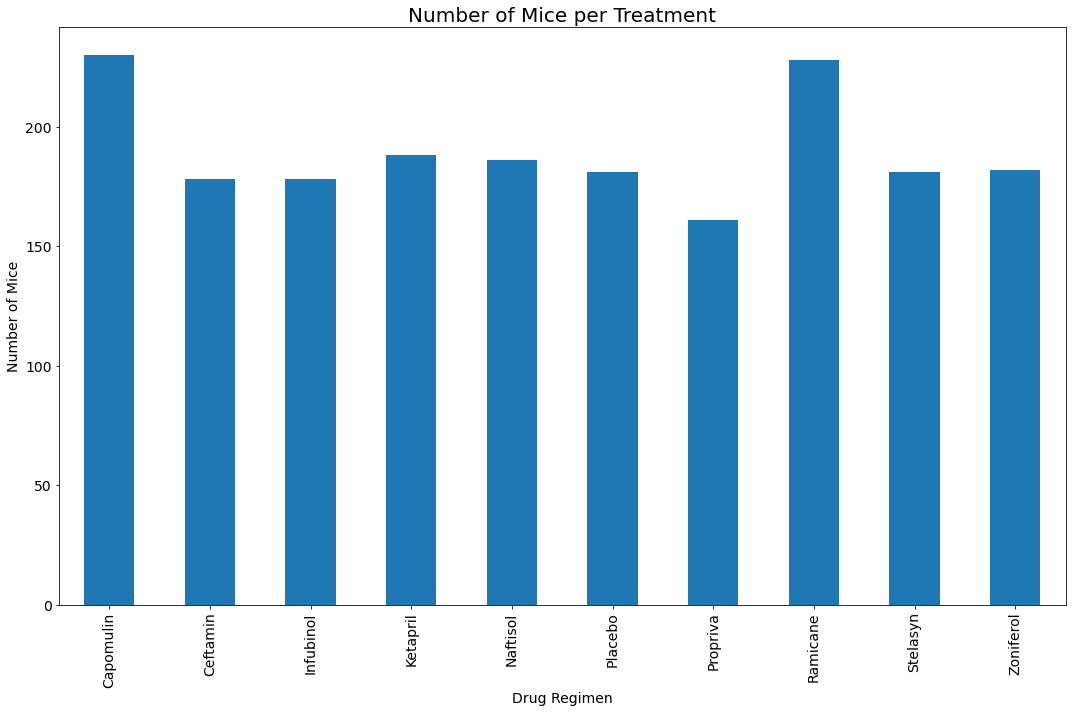

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [35]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_data = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = bar_data.plot.bar(figsize=(15,10),fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

bar_data

Text(0, 0.5, 'Number of Mice')

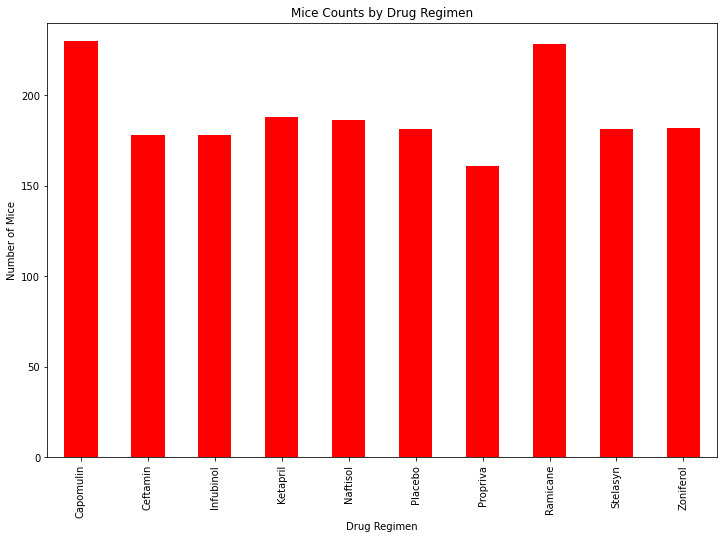

In [42]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Set x_axis & y_axis
regimen_group = merged_df.groupby(['Drug Regimen'])
regimen_count = regimen_group['Mouse ID'].count()
height = regimen_count.tolist()
x_axis = np.arange(len(summary1))

# Set up the graph size and tick labels
plt.subplots(figsize=(12,8))
regimen_names = summary1.index.tolist()
xtick_location = [value for value in x_axis] 
plt.xticks(xtick_location, regimen_names, rotation='vertical')

# Plot the bar chart and style the chart to look identical to the one above
plt.bar(x_axis,
        height,
        color='red',
        width=0.5,
        align='center')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(height)+10)
plt.title('Mice Counts by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

## Pie Plots

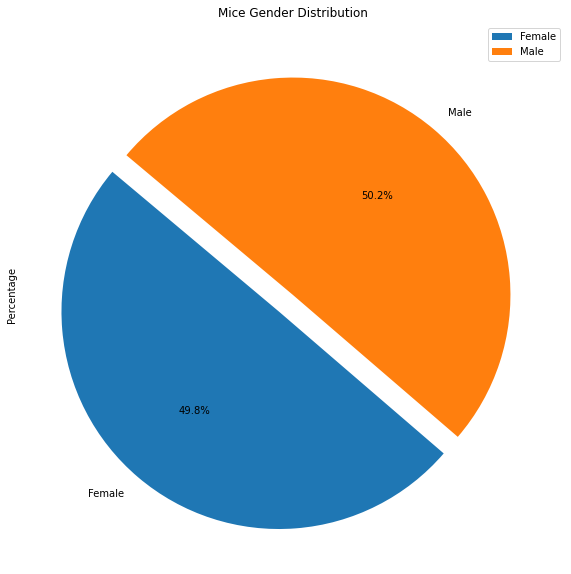

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group data by mice gender and count for the number of mice by gender
mice_gender = merged_df.groupby(['Mouse ID', 'Sex']).size()
mice_gender_count = pd.DataFrame(mice_gender).groupby(['Sex']).count()

# Calculate the total number of mice and then calculate the percentage of the number of female and male mice
total_mice_count = pd.DataFrame(mice_gender).count()
mice_gender_pct = mice_gender_count / total_mice_count          

# Create a merged data frame to contain the mice gender counts and percentage weighted
mice_gender_df = mice_gender_count.merge(mice_gender_pct, on='Sex')
mice_gender_df.columns = ['Gender Count', 'Percentage']
mice_gender_df

# Plot the pie chart
mice_gender_df.plot(kind='pie',
                    y='Percentage',
                    autopct="%1.1f%%",
                    title='Mice Gender Distribution',
                    figsize=(10,10),
                    startangle=140,
                    explode=[0.1,0])
plt.show()

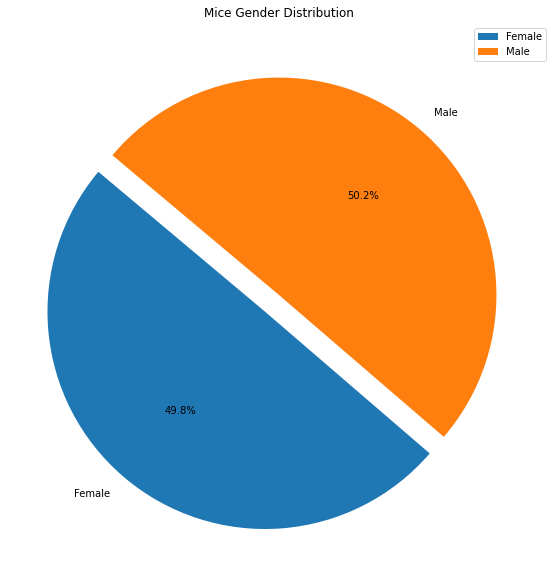

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Use the calculation above to get the mice_gender_df, and then plot the pie chart using pyplot
plt.subplots(figsize=(10,10))
plt.pie(
    mice_gender_df['Percentage'],
    labels=['Female', 'Male'],
    autopct="%1.1f%%",
    startangle=140,
    explode=[0.1,0])
plt.title('Mice Gender Distribution')
plt.legend(['Female','Male'])
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_timepoint = merged_df.loc[merged_df['Timepoint']==45]

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_tumor_vol = final_timepoint.loc[final_timepoint['Drug Regimen']=='Capomulin',
                    'Tumor Volume (mm3)']

# Calculate the IQR
capomulin_quartiles = capomulin_tumor_vol.quantile(q=[.25,.5,.75])

capomulin_upperq = capomulin_quartiles[0.75]
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

# Determine potential outliers
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
potential_outlier_capomulin = capomulin_tumor_vol.loc[(capomulin_tumor_vol < capomulin_lower_bound) | (capomulin_tumor_vol > capomulin_upper_bound)]
potential_outlier_capomulin

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [47]:
# Find final tumor volume for the Ramicane treatment
ramicane_tumor_vol = final_timepoint.loc[final_timepoint['Drug Regimen']=='Ramicane',
                    'Tumor Volume (mm3)']

# Calculate the IQR
ramicane_quartiles = ramicane_tumor_vol.quantile(q=[.25,.5,.75])

ramicane_upperq = ramicane_quartiles[0.75]
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

# Determine potential outliers
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
potential_outlier_ramicane = ramicane_tumor_vol.loc[(ramicane_tumor_vol < ramicane_lower_bound) | (ramicane_tumor_vol > ramicane_upper_bound)]
potential_outlier_ramicane

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [48]:
infubinol_tumor_vol = final_timepoint.loc[final_timepoint['Drug Regimen']=='Infubinol',
                    'Tumor Volume (mm3)']

# Calculate the IQR
infubinol_quartiles = infubinol_tumor_vol.quantile(q=[.25,.5,.75])

infubinol_upperq = infubinol_quartiles[0.75]
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

# Determine potential outliers
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
potential_outlier_infubinol = infubinol_tumor_vol.loc[(infubinol_tumor_vol < infubinol_lower_bound) | (infubinol_tumor_vol > infubinol_upper_bound)]
potential_outlier_infubinol

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [49]:
# Find final tumor volume for the Ceftamin treatment
ceftamin_tumor_vol = final_timepoint.loc[final_timepoint['Drug Regimen']=='Ceftamin',
                    'Tumor Volume (mm3)']

# Calculate the IQR
ceftamin_quartiles = ceftamin_tumor_vol.quantile(q=[.25,.5,.75])

ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

# Determine potential outliers
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
potential_outlier_ceftamin = ceftamin_tumor_vol.loc[(ceftamin_tumor_vol < ceftamin_lower_bound) | (ceftamin_tumor_vol > ceftamin_upper_bound)]
potential_outlier_ceftamin

Series([], Name: Tumor Volume (mm3), dtype: float64)

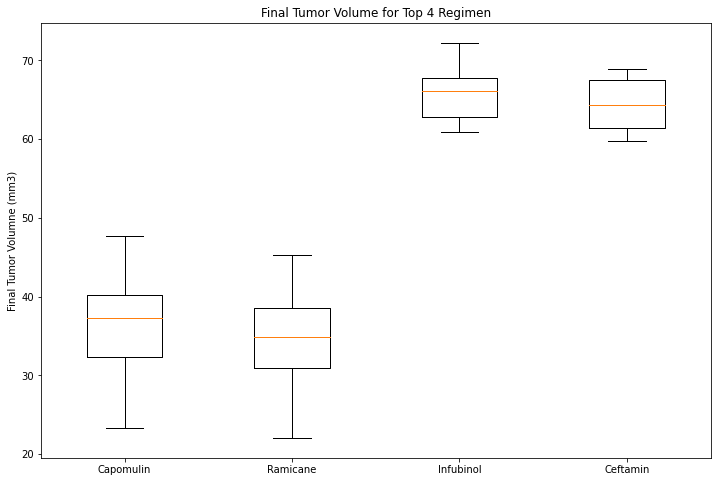

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_four_data = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
data_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.subplots(figsize=(12,8))
plt.boxplot(top_four_data, labels=data_labels)
plt.title('Final Tumor Volume for Top 4 Regimen')
plt.ylabel('Final Tumor Volumne (mm3)')
plt.show()

## Line and Scatter Plots

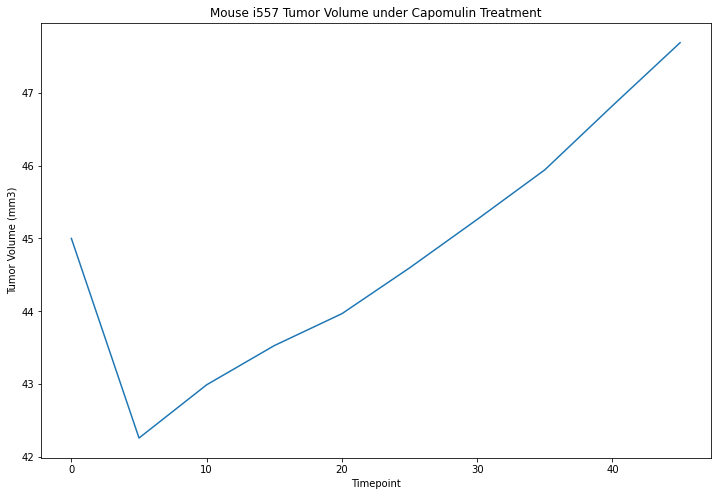

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter for the capomulin treatment
capomulin_treatment = merged_df.loc[
                      merged_df['Drug Regimen']=='Capomulin']
# Find a mouse data 
mouse_i557 = capomulin_treatment.loc[capomulin_treatment['Mouse ID']=='i557']
mouse_i557

# Set up x-axis & y-axis variable
i557_x_axis = mouse_i557['Timepoint']
i557_y_axis = mouse_i557['Tumor Volume (mm3)']

# Plot the line chart
plt.subplots(figsize=(12,8))
plt.plot(i557_x_axis,
         i557_y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse i557 Tumor Volume under Capomulin Treatment')
plt.show()

Text(0.5, 1.0, 'Average Mouse Weight v. Average Tumor Volume for Capomulin Treatment')

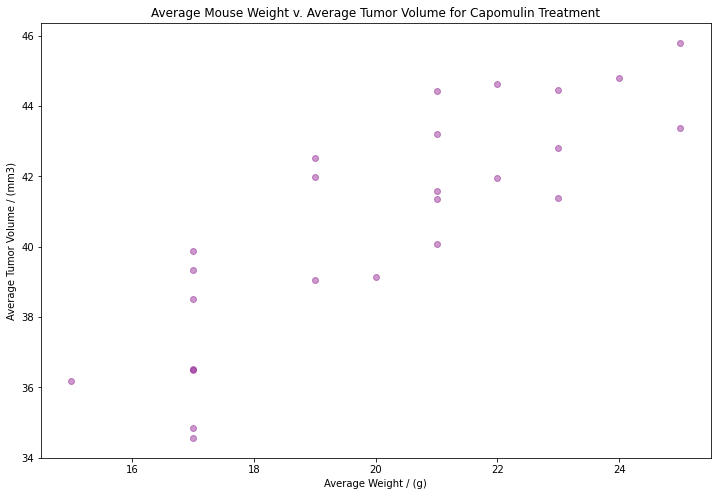

In [52]:

# Group by the capomulin_treatment dataset by 'Mouse ID'
capomulin_by_mouse = capomulin_treatment.groupby(['Mouse ID'])

# Caluclate the average weight & average tumor volume for each mouse
weight_avg = capomulin_by_mouse['Weight (g)'].mean()
tumor_volume_avg = capomulin_by_mouse['Tumor Volume (mm3)'].mean()

# Plot the scatter chart
plt.subplots(figsize=(12,8))
plt.scatter(x=weight_avg,
            y=tumor_volume_avg,
            facecolors='purple',
            alpha=0.4)
plt.xlabel('Average Weight / (g)')
plt.ylabel('Average Tumor Volume / (mm3)')
plt.title('Average Mouse Weight v. Average Tumor Volume for Capomulin Treatment')

## Correlation and Regression

y = 0.95x + 21.55


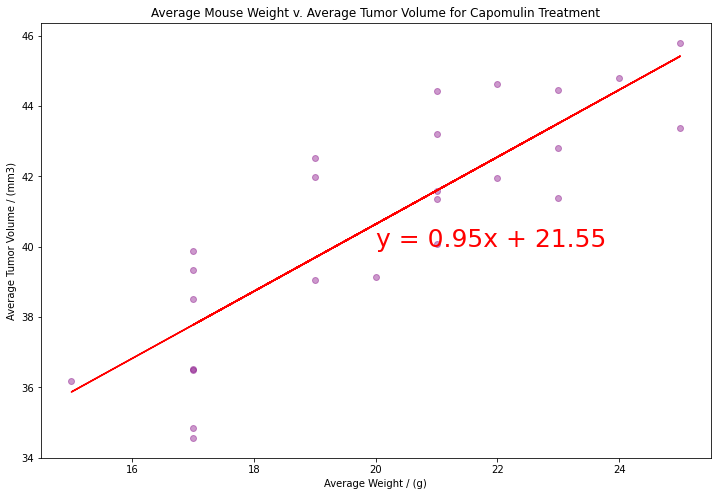

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set up x-axis and y-axis
weight_avg = capomulin_by_mouse['Weight (g)'].mean()
tumor_volume_avg = capomulin_by_mouse['Tumor Volume (mm3)'].mean()

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_avg, tumor_volume_avg)    
regression_values = weight_avg * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter chart
plt.subplots(figsize=(12,8))
plt.scatter(x=weight_avg,
            y=tumor_volume_avg,
            facecolors='purple',
            alpha=0.4)
plt.xlabel('Average Weight / (g)')
plt.ylabel('Average Tumor Volume / (mm3)')
plt.title('Average Mouse Weight v. Average Tumor Volume for Capomulin Treatment')

# Add linear regression line to plot
plt.plot(weight_avg,regression_values,'r-')                     
plt.annotate(line_equation,(20,40), fontsize=25, color='red')
plt.xlabel('Average Weight / (g)')
plt.ylabel('Average Tumor Volume / (mm3)')
plt.title('Average Mouse Weight v. Average Tumor Volume for Capomulin Treatment')
print(line_equation)
plt.show()